# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [135]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

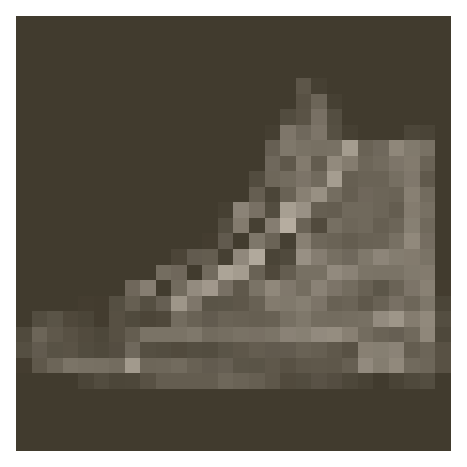

In [106]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [107]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

In [108]:
torch.cuda.is_available()

True

In [109]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [133]:
# TODO: Define your network architecture here

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(28 * 28, 400) # 28 * 28 = 784 is the image dimension
        self.fc2 = nn.Linear(400, 200)
        self.fc3 = nn.Linear(200, 100)
        self.fc4 = nn.Linear(100, 10)
        
    def forward(self, x):
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        
        return x
        
net = Net()
net = net.to(device)

print(net)
        

Net(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)


# Train the network

Now you should train your network. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [115]:
# TODO: Create the network, define the criterion and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [116]:
# TODO: Train the network here

epochs = 15
print_every = 500
steps = 0

for epoch in range(epochs):
    running_loss = 0.0
    
    for images, labels in iter(trainloader):
        steps += 1
        
        # Resize images into one vector
        images.resize_(images.size()[0], 784)
        images, labels = images.to(device), labels.to(device)

        # Set all the wights and biases to 
        optimizer.zero_grad()
        
        # Forward pass
        output = net.forward(images)
        
        # Calculate loss
        loss = criterion(output, labels)
        
        # Backward pass
        loss.backward()
        
        # Update weight and biases
        optimizer.step()
        
        # add loss?
        running_loss += loss.item()
        
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(epoch+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0


Epoch: 1/15...  Loss: 2.1141
Epoch: 2/15...  Loss: 0.2115
Epoch: 2/15...  Loss: 1.6925
Epoch: 3/15...  Loss: 0.4154
Epoch: 3/15...  Loss: 1.6673
Epoch: 4/15...  Loss: 0.6198
Epoch: 4/15...  Loss: 1.6567
Epoch: 5/15...  Loss: 0.8200
Epoch: 5/15...  Loss: 1.6498
Epoch: 6/15...  Loss: 1.0211
Epoch: 6/15...  Loss: 1.6475
Epoch: 7/15...  Loss: 1.2202
Epoch: 7/15...  Loss: 1.6447
Epoch: 8/15...  Loss: 1.4233
Epoch: 8/15...  Loss: 1.6389
Epoch: 9/15...  Loss: 1.6232
Epoch: 10/15...  Loss: 0.1902
Epoch: 10/15...  Loss: 1.6301
Epoch: 11/15...  Loss: 0.3928
Epoch: 11/15...  Loss: 1.6339
Epoch: 12/15...  Loss: 0.5916
Epoch: 12/15...  Loss: 1.6334
Epoch: 13/15...  Loss: 0.7928
Epoch: 13/15...  Loss: 1.6292
Epoch: 14/15...  Loss: 0.9963
Epoch: 14/15...  Loss: 1.6238
Epoch: 15/15...  Loss: 1.1960
Epoch: 15/15...  Loss: 1.6273


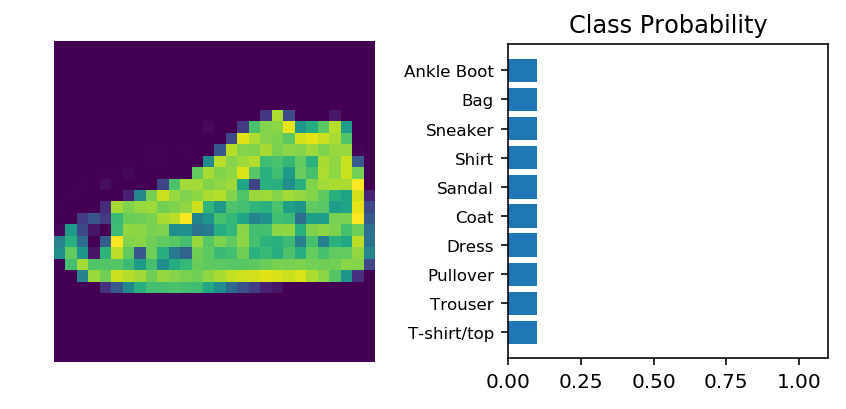

In [134]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
#img, labels = img.to(device), labels.to(device)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = net.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.